<a href="https://colab.research.google.com/github/AvikJakhmola/EDA_DA/blob/main/21BDS0139.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Step 2: Load the Dataset
file_path = "/content/credit card.csv"
data = pd.read_csv(file_path)

In [ ]:
# Step 3: Initial Dataset Exploration
print("Dataset Dimensions:", data.shape)
print("\nFirst Few Rows:")
print(data.head())

Dataset Dimensions: (5000, 14)

First Few Rows:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

  Personal Loan Securities Account CD Account  Online CreditCard  
0             0                  1          0       0          0  
1             0                  1          0       0          0  
2             0                  0          0       0          0  
3             0                  0          0       0          0  
4             0                  0          0       0          1  


In [ ]:
print("\nSummary Statistics:")
print(data.describe())




Summary Statistics:
                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage       Online  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean      2.396400     1.937938     1.881000    56.498800     0.596800  
std       1.147663     1.747659     0.839869   101.713802     0.490589  
min       1

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [ ]:
# Step 4: Handle Missing Data (Example Strategy)
data.replace('?', np.nan, inplace=True)
data.fillna(data.mean(numeric_only=True), inplace=True)




Univariate Analysis Plots:


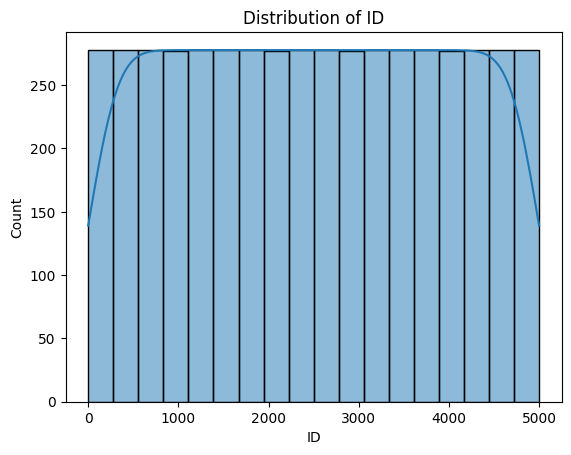

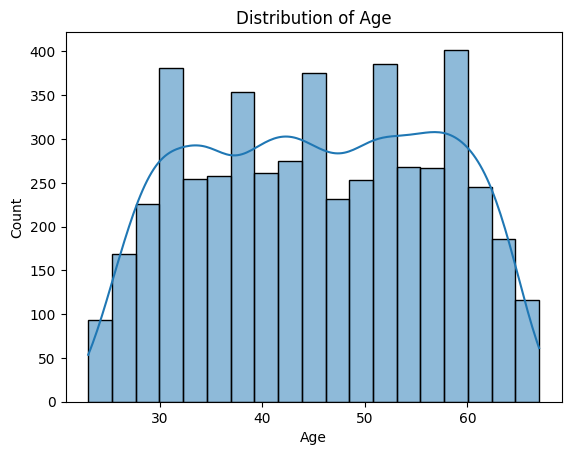

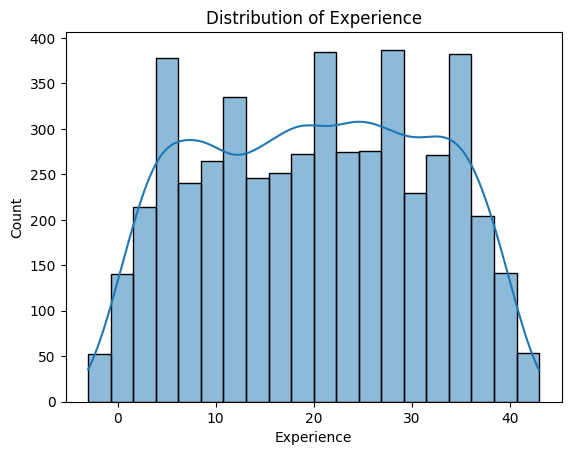

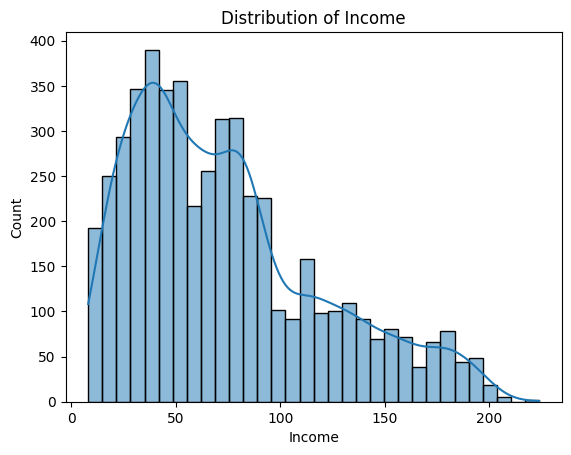

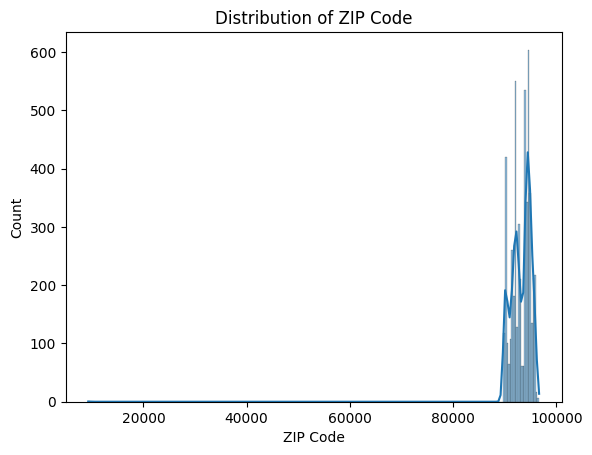

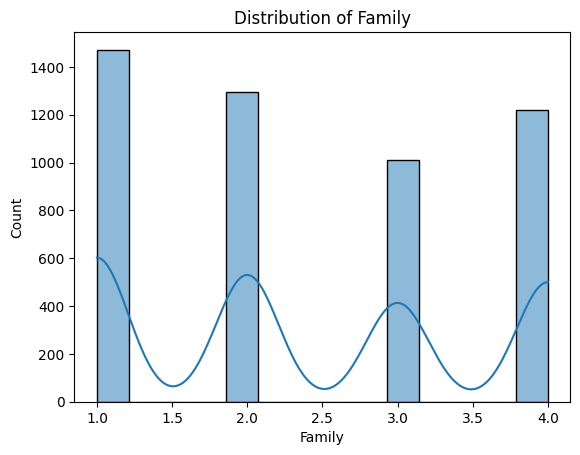

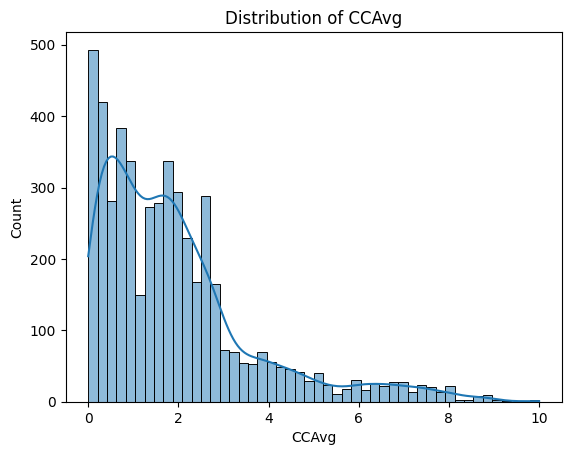

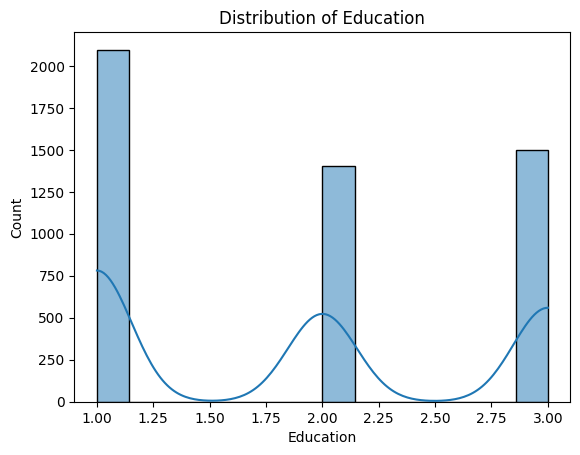

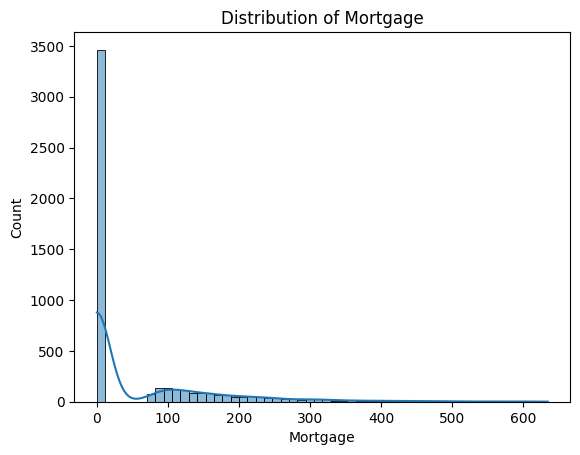

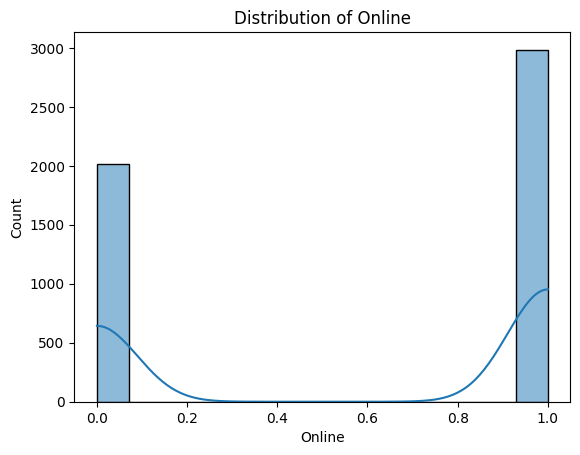

In [ ]:
# Step 5: Univariate Analysis
print("\nUnivariate Analysis Plots:")
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


Correlation Matrix:


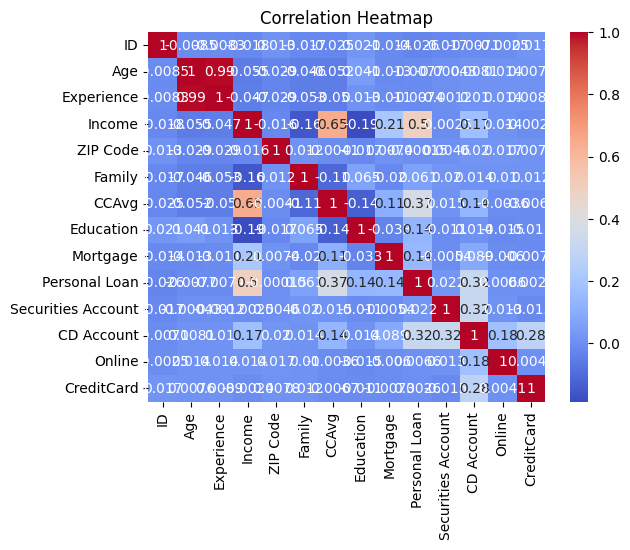

In [ ]:
# Step 6: Bivariate Analysis
print("\nCorrelation Matrix:")
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Step 7: Data Preparation for Modeling
target_column = 'Personal Loan'

if data[target_column].isnull().sum() > 0:
    print(f"Missing values in {target_column}: {data[target_column].isnull().sum()}")
    most_frequent_value = data[target_column].mode()[0]
    data[target_column].fillna(most_frequent_value, inplace=True)
    X = data.drop(columns=[target_column, 'ID', 'ZIP Code'], errors='ignore')

y = data[target_column].astype(int)

X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Step 8: Build a Random Forest Classifier
print("\nBuilding Random Forest Classifier...")
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


Building Random Forest Classifier...


RandomForestClassifier(random_state=42)

In [ ]:
# Step 9: Evaluate the Model
y_pred = clf.predict(X_test)
print("\nModel Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy Score: 0.9893333333333333
Confusion Matrix:
 [[1342    1]
 [  15  142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.90      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [ ]:
# Step 10: Feature Importance
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances.head(10))



Feature Importances:
              Importance
Income          0.353204
Education       0.198987
CCAvg           0.145824
Family          0.112983
CD Account_1    0.049185
Age             0.041527
Mortgage        0.039464
Experience      0.038936
CreditCard_1    0.008688
Online          0.006784


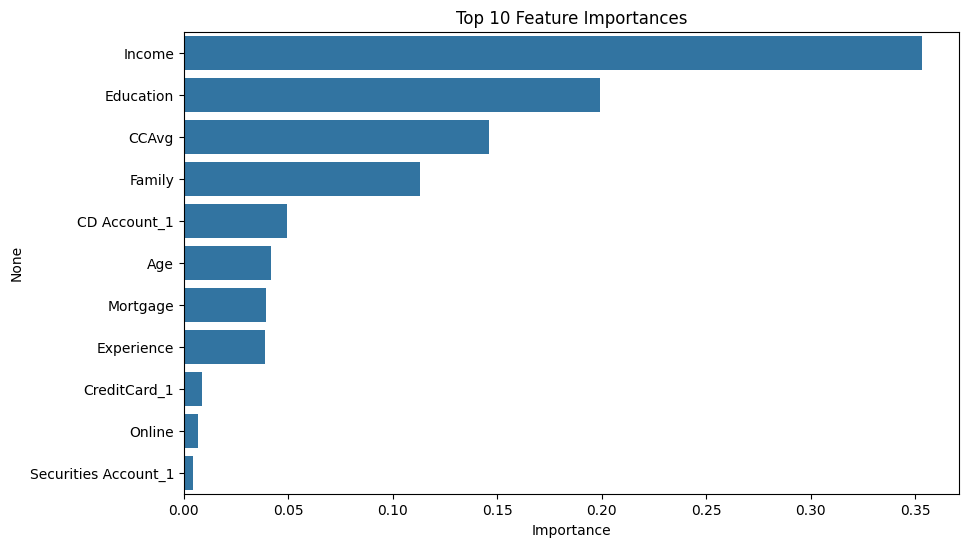

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title("Top 10 Feature Importances")
plt.show()